In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.book import text1
import matplotlib.pyplot as plt
import numpy as np


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# TASK 0

Найпоширеніші слова (до стемінгу):
[('the', 14431), ('of', 6609), ('and', 6430), ('a', 4736), ('to', 4625), ('in', 4172), ('that', 3085), ('his', 2530), ('it', 2522), ('i', 2127), ('he', 1896), ('but', 1818), ('s', 1802), ('as', 1741), ('is', 1725), ('with', 1722), ('was', 1644), ('for', 1617), ('all', 1526), ('this', 1394), ('at', 1319), ('whale', 1226), ('by', 1204), ('not', 1151), ('from', 1088), ('him', 1067), ('so', 1065), ('on', 1062), ('be', 1045), ('one', 921)]

Найпоширеніші основи (після стемінгу):
[('the', 14431), ('of', 6613), ('and', 6437), ('a', 4736), ('to', 4628), ('in', 4172), ('that', 3085), ('it', 2898), ('hi', 2530), ('i', 2127), ('he', 1896), ('but', 1818), ('s', 1802), ('as', 1741), ('is', 1725), ('with', 1722), ('wa', 1645), ('whale', 1626), ('for', 1617), ('all', 1526), ('thi', 1507), ('at', 1319), ('be', 1279), ('by', 1204), ('not', 1151), ('from', 1088), ('him', 1067), ('so', 1065), ('on', 1062), ('one', 941)]


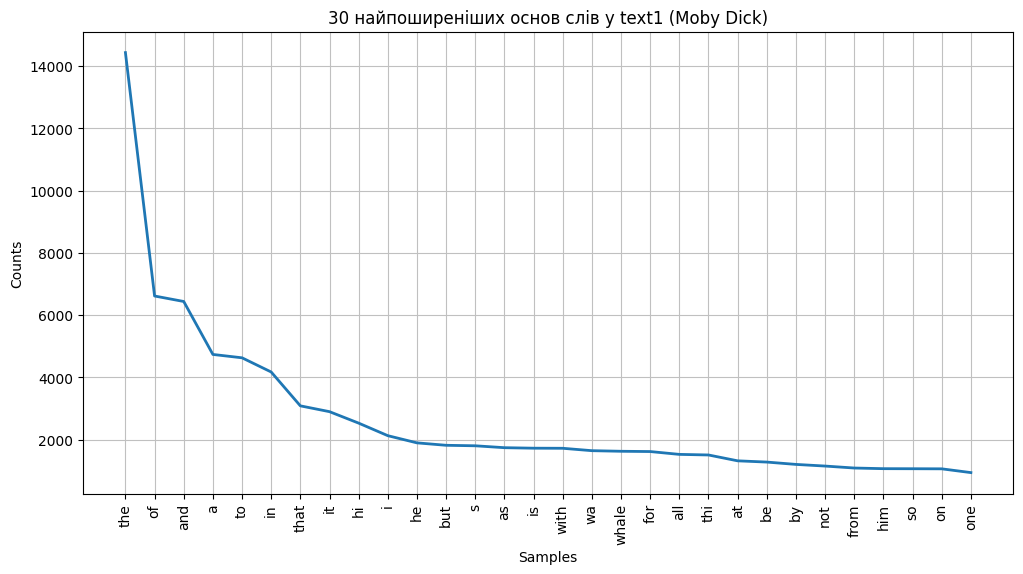

In [2]:
porter_stemmer = PorterStemmer()

words_original = [word.lower() for word in text1 if word.isalpha()]
stemmed_words = [porter_stemmer.stem(word) for word in words_original]

freq_dist_original = FreqDist(words_original)
freq_dist_stemmed = FreqDist(stemmed_words)

print("Найпоширеніші слова (до стемінгу):")
print(freq_dist_original.most_common(30))

print("\nНайпоширеніші основи (після стемінгу):")
print(freq_dist_stemmed.most_common(30))


plt.figure(figsize=(12, 6))
freq_dist_stemmed.plot(30, title='30 найпоширеніших основ слів у text1 (Moby Dick)')
plt.show()

# TASK 1

In [3]:
import re
from nltk.stem.api import StemmerI

class UkrainianStemmer(StemmerI):
    def __init__(self):
        self.perfective_gerund = re.compile(r'ши$|вши$')
        self.adjective = re.compile(r'іший$|а$|е$|ий$|ій$|ій$|ої$|ів$|є$|ю$|я$|і$|у$')
        self.participle = re.compile(r'аний$|ений$|ний$')
        self.verb = re.compile(r'ати$|ети$|ити$|увати$|ювати$|яти$|ав$|али$|ало$|ала$')
        self.noun = re.compile(r'ість$|істю$|ові$|ова$|ове$|ов$|ок$|ом$|ами$|ах$')
        self.superlative = re.compile(r'най')
        self.reflexive = re.compile(r'ся$|сь$')

    def stem(self, word):
        word = word.lower()

        word = self.perfective_gerund.sub('', word)
        word = self.reflexive.sub('', word)
        word = self.participle.sub('', word)
        word = self.adjective.sub('', word)
        word = self.verb.sub('', word)
        word = self.noun.sub('', word)
        word = self.superlative.sub('', word)
        
        return word

In [4]:
ukr_stemmer = UkrainianStemmer()
words_ukrainian = ["програмування", "програмісти", "програмувала", "запрограмований", "програмний"]
stemmed_ukr = [ukr_stemmer.stem(word) for word in words_ukrainian]

print("\n=== Ukrainian Stemmer ===")
print("Оригінальні слова:", words_ukrainian)
print("Основи слів:", stemmed_ukr)

words_ukrainian_2 = ["книжка", "книжки", "книжкою", "книжці", "найкращий"]
stemmed_ukr_2 = [ukr_stemmer.stem(word) for word in words_ukrainian_2]
print("\nОригінальні слова:", words_ukrainian_2)
print("Основи слів:", stemmed_ukr_2)


=== Ukrainian Stemmer ===
Оригінальні слова: ['програмування', 'програмісти', 'програмувала', 'запрограмований', 'програмний']
Основи слів: ['програмуванн', 'програмісти', 'програмувал', 'запрограм', 'програм']

Оригінальні слова: ['книжка', 'книжки', 'книжкою', 'книжці', 'найкращий']
Основи слів: ['книжк', 'книжки', 'книжко', 'книжц', 'кращ']


# TASK 2

In [ ]:

def wagner_fischer(s1, s2):
    len_s1, len_s2 = len(s1), len(s2)
    dist_matrix = np.zeros((len_s1 + 1, len_s2 + 1), dtype=int)

    for i in range(len_s1 + 1):
        dist_matrix[i][0] = i
    for j in range(len_s2 + 1):
        dist_matrix[0][j] = j

    for i in range(1, len_s1 + 1):
        for j in range(1, len_s2 + 1):
            cost = 0 if s1[i-1] == s2[j-1] else 1  # Вартість заміни
            dist_matrix[i][j] = min(
                dist_matrix[i-1][j] + 1,        # Видалення
                dist_matrix[i][j-1] + 1,        # Вставка
                dist_matrix[i-1][j-1] + cost    # Заміна
            )
            
    return dist_matrix[len_s1][len_s2]

In [6]:
str1 = "kitten"
str2 = "sitting"
distance = wagner_fischer(str1, str2)
print(f"\nВідстань Левенштейна між '{str1}' та '{str2}': {distance}")


Відстань Левенштейна між 'kitten' та 'sitting': 3
